In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from pathlib import Path

## Preprocessing the dataset

Images need to go to a df, then convert the RGB channels into pixels.

In [5]:
dataset_route = "../GroceryStoreDataset/dataset/"
train_txt_route = "../GroceryStoreDataset/dataset/train.txt"
val_txt_route = "../GroceryStoreDataset/dataset/val.txt"
test_txt_route = "../GroceryStoreDataset/dataset/test.txt"

In [6]:
def process_txt(route):
    df = pd.read_csv(route, sep=",",header=None,names=["route", "fine", "coarse", 'tensor'])
    return df

In [7]:
df = process_txt(train_txt_route)
df.head()

,route,fine,coarse,tensor
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN


In [8]:
df.shape

(2640, 4)

In [9]:
df_val = process_txt(val_txt_route)
df_val.head()

,route,fine,coarse,tensor
0,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
1,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
2,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
3,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
4,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN


In [10]:
df_test = process_txt(test_txt_route)
df_test.head()

,route,fine,coarse,tensor
0,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
1,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
2,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
3,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
4,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN


## From images to pixels

ResNet CNN uses a 224x224 pixels. Then, we must:

1. resize the images
2. convert them into a processable data for the cnn

In [11]:
def resize_image(route, size=(224,224)):
    img = tf.io.read_file(route)
    img = tf.image.decode_jpeg(img, channels=3)
    img_resized = tf.image.resize(img, [224, 224])
    img_normalised = img_resized / 255.0 # normalise data to improve performance and acc
    return img_normalised

In [14]:
df["tensor"] = df["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df.head()

,route,fine,coarse,tensor
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.07058824, shape=(), dtype=float..."
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.5783479, shape=(), dtype=float3..."
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.34684873, shape=(), dtype=float..."
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.74612814, shape=(), dtype=float..."
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.394208, shape=(), dtype=float32..."


In [15]:
df_val["tensor"] = df_val["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df_val.head()

,route,fine,coarse,tensor
0,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.44126683, shape=(), dtype=float..."
1,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.13513376, shape=(), dtype=float..."
2,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.15215617, shape=(), dtype=float..."
3,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.056168094, shape=(), dtype=floa..."
4,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.6362045, shape=(), dtype=float3..."


In [16]:
df_test["tensor"] = df_test["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df_test.head()

,route,fine,coarse,tensor
0,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.5455182, shape=(), dtype=float3..."
1,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.5507003, shape=(), dtype=float3..."
2,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.2863658, shape=(), dtype=float3..."
3,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.42406806, shape=(), dtype=float..."
4,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.29791948, shape=(), dtype=float..."


## Research the data - it is balanced?

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_fine_distribution(df):
    if "fine" not in df.columns:
        raise ValueError("El DataFrame no contiene la columna 'fine'")
    
    value_counts = df["coarse"].value_counts()
    
    plt.figure(figsize=(14, 8))
    value_counts.plot(kind="bar", color="skyblue")
    plt.xlabel("Valores de 'coarse'")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de la columna 'fine'")
    plt.xticks(rotation=90, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

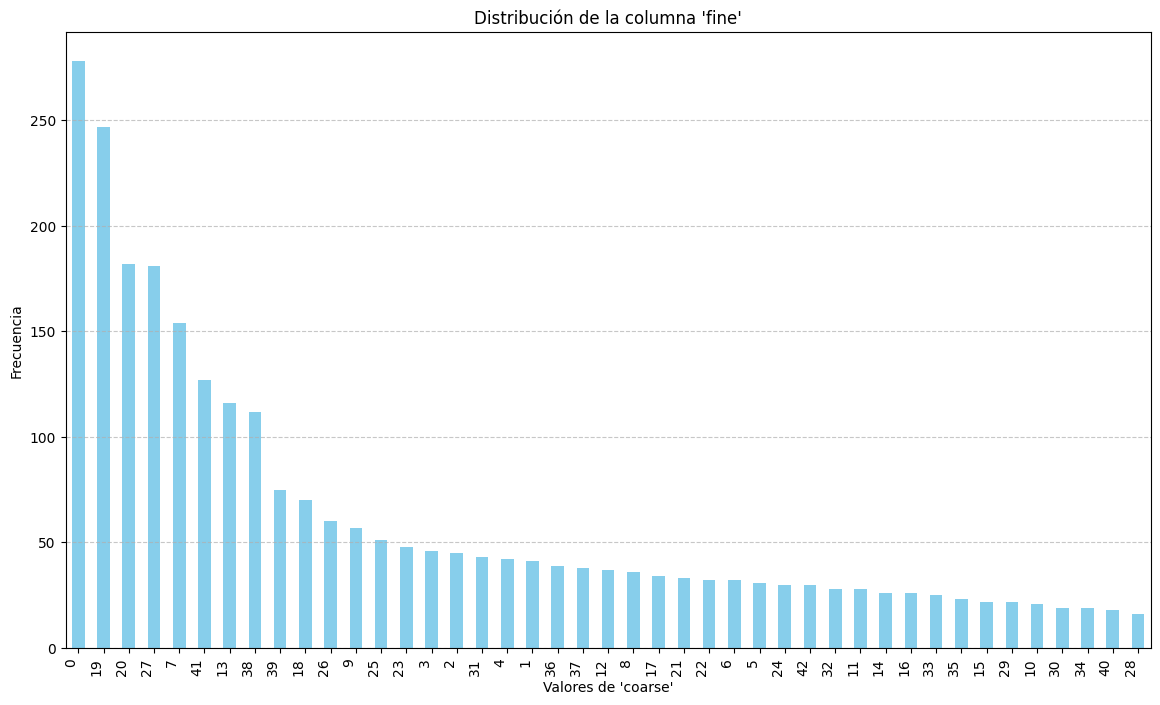

In [28]:
plot_fine_distribution(df)

No está balanceado ni mucho menos. Podemos borrar datos, o generar datos sintéticos. Optamos por la segunda opción.

In [34]:
class_counts = df['coarse'].value_counts()
min_class_count = class_counts.min()  # Número mínimo de instancias en una clase
min_class_count

np.int64(16)

In [38]:
# Crear un DataFrame vacío para almacenar las muestras balanceadas
undersampled_df = pd.DataFrame()

# Realizar undersampling para cada clase
for clase in class_counts.index:
    # Filtrar las instancias de la clase
    class_subset = df[df['coarse'] == clase]
    # Realizar el undersampling
    undersampled_subset = class_subset.sample(n=min_class_count, random_state=42)
    # Concatenar las muestras balanceadas
    undersampled_df = pd.concat([undersampled_df, undersampled_subset])

# Mezclar el DataFrame resultante
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [39]:
undersampled_df.head()

,route,fine,coarse,tensor
0,train/Fruit/Lemon/Lemon_016.jpg,8,4,"(((tf.Tensor(0.45785782, shape=(), dtype=float..."
1,train/Vegetables/Ginger/Ginger_013.jpg,65,34,"(((tf.Tensor(0.18032432, shape=(), dtype=float..."
2,train/Vegetables/Carrots/Carrots_025.jpg,62,31,"(((tf.Tensor(0.38280252, shape=(), dtype=float..."
3,train/Fruit/Peach/Peach_018.jpg,19,12,"(((tf.Tensor(0.8906219, shape=(), dtype=float3..."
4,train/Vegetables/Brown-Cap-Mushroom/Brown-Cap-...,67,36,"(((tf.Tensor(0.205007, shape=(), dtype=float32..."


## ResNet-34 - overfitted asf

No es útil porque hay demasiadas pocos datos. Y demasiadas capas. **El overfitting ocurre por cosas como estas**. Siempre, siempre, hay que buscar la cantidad de capas justa y necesaria (gasto y consumo computacional reducido aparte).

Mejor probamos con **MobileNetV2**.

[Link](https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/)

In [43]:
from tensorflow.keras.utils import to_categorical

X_train = np.stack(undersampled_df["tensor"].values)
y_train = np.array(undersampled_df["coarse"].values)

X_val = np.stack(undersampled_df["tensor"].values)
y_val = np.array(undersampled_df["coarse"].values)

X_test = np.stack(undersampled_df["tensor"].values)
y_test = np.array(undersampled_df["coarse"].values)

# Suponiendo que tienes las etiquetas como números enteros
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

X_train.shape

(688, 224, 224, 3)

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capas para evitar sobreajuste

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(43, activation='softmax')
])

model.compile(
    optimizer='adam',  # Optimizador recomendado
    loss='categorical_crossentropy',  # Para clasificación multiclase
    metrics=['accuracy']  # Para evaluar el rendimiento
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,582,315 (105.22 MB)

 Trainable params: 12,867,627 (49.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 150s 7s/step - accuracy: 0.0694 - loss: 5.9656 - val_accuracy: 0.4288 - val_loss: 2.4579
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3015 - loss: 2.6295

KeyboardInterrupt: 

In [28]:
model.save('model.keras')  # Para Keras